# <center>Практична робота #8<center>

## Тема: 
### Жадібні алгоритми. Наближене розв’язання екстремальних задач

## Мета: 
### Набути практичних навичок застосування деяких жадібних алгоритмів для розв’язання екстремальних задач.

#  <center>Хід роботи<center>

## 1. (2-ий варіант) Заданий зважений граф: [(1,2,5), (2,3,7), (2,4,3), (3,4,6)]

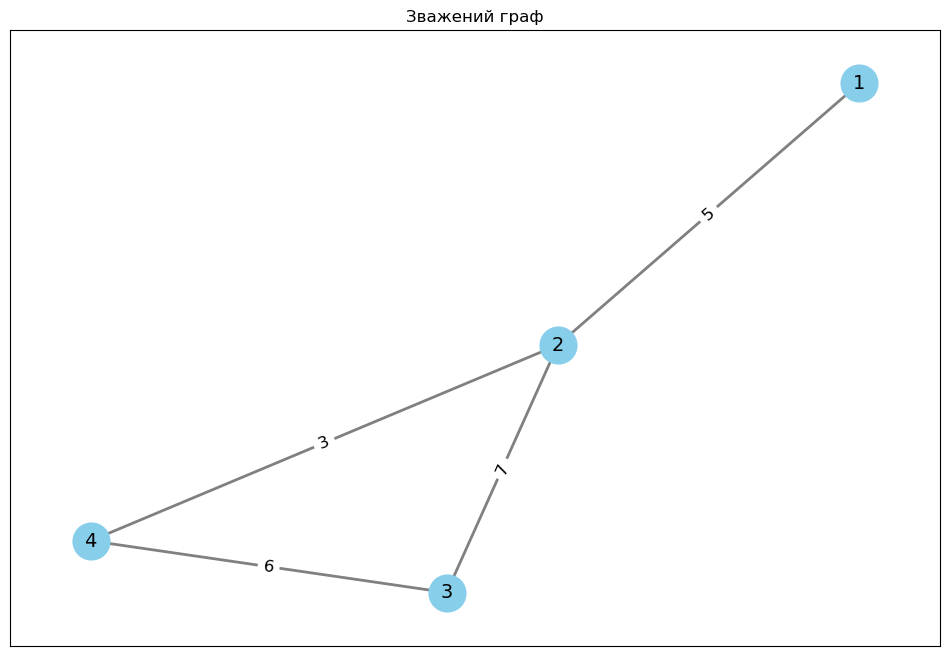

In [2]:
# Імпортуємо потрібні бібліотеки
import networkx as nx
import matplotlib.pyplot as plt

# Створюємо граф
G = nx.Graph()

# Додаємо вершини
G.add_nodes_from(range(1, 4))

# Додаємо ребра з вагами
edges = [
    (1, 2, 5), (2, 3, 7), (2, 4, 3), 
    (3, 4, 6) 
   
]
G.add_weighted_edges_from(edges)

# Генеруємо позиції для відображення вершин
pos = nx.spring_layout(G)  # Функція для розташування вершин у гармонійному вигляді

# Візуалізація вузлів
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif')

# Візуалізація ребер
nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, edge_color='gray')

# Додавання підписів для ваг ребер
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# Показуємо графік
plt.title("Зважений граф")
plt.show()

Маршрут, знайдений алгоритмом найближчого сусіда: [1, 2, 4, 3]


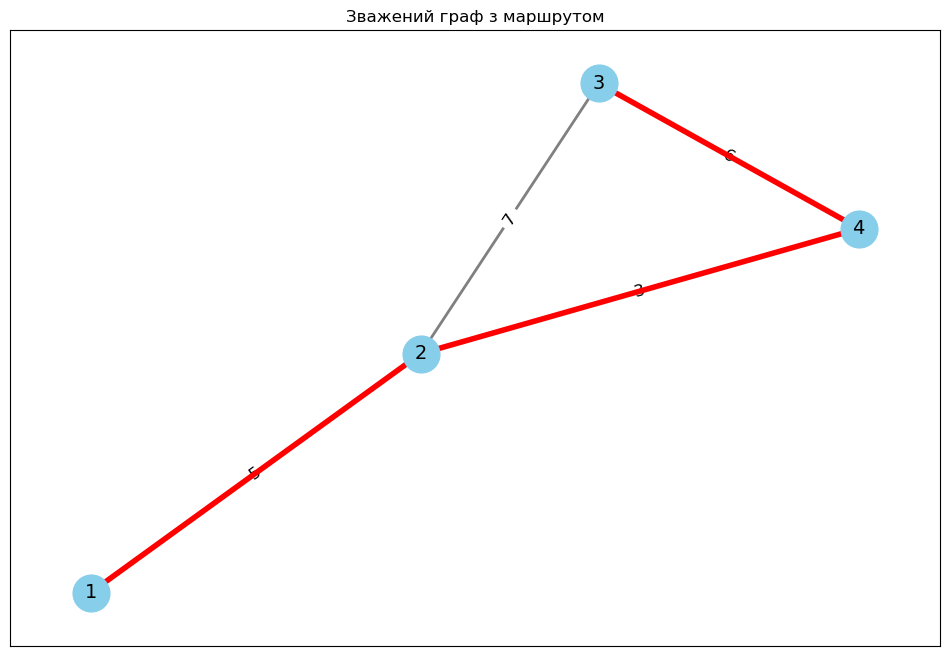

In [19]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Алгоритм найближчого сусіда для графа з перевіркою ізольованих вершин
def nearest_neighbor_algorithm_graph(G):
    nodes = list(G.nodes)
    N = len(nodes)
    visited = [False] * N
    tour = []
    
    # Вибираємо довільну точку
    current_node = int(np.random.choice(nodes))  # Конвертація в int
    tour.append(current_node)
    visited[nodes.index(current_node)] = True
    
    for _ in range(1, N):
        previous_node = current_node
        min_distance = float('inf')
        next_node = None
        
        # Шукаємо найближче непосещене сусіднє місто
        for neighbor in G.neighbors(previous_node):
            if not visited[nodes.index(neighbor)]:
                distance = G[previous_node][neighbor]['weight']
                if distance < min_distance:
                    min_distance = distance
                    next_node = neighbor
        
        # Якщо знайшли наступну вершину, переходимо до неї
        if next_node is not None:
            current_node = next_node
            tour.append(current_node)
            visited[nodes.index(current_node)] = True
        else:
            # Якщо всі сусіди вже відвідані, але залишились ізольовані вершини
            unvisited_nodes = [nodes[i] for i in range(N) if not visited[i]]
            if unvisited_nodes:
                current_node = unvisited_nodes[0]  # Переходимо до будь-якої невідвіданої вершини
                tour.append(current_node)
                visited[nodes.index(current_node)] = True
    
    # Перевіряємо, чи є шлях назад до стартової вершини
    if G.has_edge(tour[-1], tour[0]):
        tour.append(tour[0])  # Додаємо тільки якщо шлях існує
    return tour

# Створення графа
G = nx.Graph()

# Додавання вершин та ребер
edges = [
    (1, 2, 5), (2, 3, 7), (2, 4, 3), 
    (3, 4, 6) 
]
G.add_weighted_edges_from(edges)

# Застосування алгоритму найближчого сусіда
tour = nearest_neighbor_algorithm_graph(G)
print("Маршрут, знайдений алгоритмом найближчого сусіда:", tour)

# Візуалізація графа
# Генеруємо позиції для відображення вершин
pos = nx.spring_layout(G)  # Функція для розташування вершин у гармонійному вигляді

# Візуалізація вузлів
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif')

# Візуалізація ребер
nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, edge_color='gray')

# Додавання підписів для ваг ребер
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# Виділяємо маршрут
tour_edges = [(tour[i], tour[i+1]) for i in range(len(tour)-1)]
nx.draw_networkx_edges(G, pos, edgelist=tour_edges, width=4, edge_color='red')

# Показуємо графік
plt.title("Зважений граф з маршрутом")
plt.show()


## Обґрунтувати асимптотику для обох алгоритмів

### Груба сила:

#### Асимптотична складність: O(n!)

Обґрунтування: Алгоритм грубої сили (перебір усіх можливих маршрутів) вирішує задачу комівояжера шляхом перебору всіх можливих перестановок точок. У задачі з 𝑛 точками, є 𝑛! (факториал) можливих перестановок для відвідування точок. Для кожної перестановки обчислюється загальна відстань маршруту (сума ваг на ребрах). Отже, алгоритм має складність O(n!), оскільки для кожної перестановки потрібно виконати перевірку, а число перестановок для n елементів зростає факторіально.

### Алгоритм найближчого сусіда:

#### Асимптотична складність: $O(n^2logn)$

Обґрунтування:Алгоритм найближчого сусіда починається з вибору випадкової точки та повторює крок вибору найближчої точки, яка ще не була відвідана. Для кожної точки Для кожної точки 𝑖 (всього 𝑛 точок), алгоритм знаходить найменшу відстань до всіх ще не відвіданих точок. Це означає, що для кожної з 𝑛 точок потрібно виконати O(n) операцій пошуку найближчого сусіда.Всього це дасть складність $O(n^2)$. на пошук маршруту. Оскільки кожен пошук найменшої відстані передбачає обчислення відстаней для всіх можливих точок, можна сказати, що кожен пошук займає O(n) операцій, а сам алгоритм виконується за $O(n^2)$..

Проте, якщо зберігати відстані між точками у вигляді матриці чи використовувати структури даних для ефективного пошуку, складність може знизитися до $O(n^2logn)$.

# **Контрольні питання**

### 1. Що таке жадібний алгоритм?

Жадібний алгоритм — це алгоритмічний підхід, який у процесі розв'язання задачі на кожному кроці вибирає локально оптимальне рішення з надією, що воно приведе до глобально оптимального результату.

### 2. Які головні принципи роботи жадібних алгоритмів?

Основні принципи роботи жадібних алгоритмів:
1. **Локальна оптимальність**: На кожному етапі алгоритм приймає рішення, яке здається найкращим у поточний момент.
2. **Незмінність вибору**: Прийняті раніше рішення не переглядаються.
3. **Розбиття на підзадачі**: Задача розбивається на підзадачі, які розв'язуються аналогічним способом.

### 3. Яка головна відмінність між жадібними алгоритмами та динамічним програмуванням?

| **Жадібний алгоритм**                           | **Динамічне програмування**                      |
|-------------------------------------------------|------------------------------------------------|
| Приймає локально оптимальні рішення на кожному етапі. | Розв'язує задачу, будуючи оптимальне рішення для всіх підзадач. |
| Рішення базується лише на поточній інформації.   | Використовує попередньо обчислені результати для побудови оптимального рішення. |
| Швидше в реалізації та виконанні (за умови придатності). | Часто потребує більше пам'яті та часу для розрахунків. |

### 4. Наведіть приклади задач, які можна розв’язати за допомогою жадібних алгоритмів.

- **Задача про здачу решти**: Вибір мінімальної кількості монет для видачі заданої суми (за умови стандартних номіналів).
- **Задача про зважування**: Вибір мінімальної кількості зважувань для визначення нерівноважного об'єкта.
- **Задача про оптимальне завантаження**: Наприклад, заповнення рюкзака (за умови, що всі предмети діляться на частини).
- **Задача Краскала**: Побудова мінімального остовного дерева.
- **Задача Гаффмана**: Побудова оптимального префіксного коду.

### 5. Які можуть бути обмеження у використанні жадібних алгоритмів для розв'язання екстремальних задач?

- **Відсутність глобальної оптимальності**: Жадібний алгоритм не гарантує знаходження глобально оптимального рішення для всіх задач.
- **Залежність від структури задачі**: Алгоритм працює правильно лише для задач, які мають "жадібну природу" (тобто допускають побудову оптимального рішення на основі локальних виборів).
- **Відсутність можливості перегляду**: Прийняті раніше рішення не переглядаються, навіть якщо вони виявляються некоректними для глобальної оптимізації.

### 6. Чому жадібні алгоритми часто використовуються для наближеного розв’язання екстремальних задач?

- **Швидкість виконання**: Жадібні алгоритми мають меншу обчислювальну складність у порівнянні з іншими підходами, такими як динамічне програмування чи метод повного перебору.
- **Простота реалізації**: Їхня логіка проста для розуміння та реалізації.
- **Достатня точність**: Для багатьох задач, де не потрібна абсолютна оптимальність, жадібний підхід дає рішення, близьке до оптимального.
- **Мінімальні вимоги до пам'яті**: Жадібні алгоритми зазвичай використовують менше пам'яті, оскільки не потребують зберігання попередніх розрахунків.